## Import Libraries

In [8]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


%matplotlib inline


## Load the Data

In [10]:
df = pd.read_csv("data_cleaned.csv")

In [11]:
df.shape

(10663, 19)

In [12]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


## Preprocess the Data

#### Split the data into categorical and numerical

In [13]:
numeric_features = ['height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value']
categorical_features = ['team', 'position']

In [14]:
for i in categorical_features: # checking outliers in categorical features
    print(df[i].value_counts())

Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
Swansea City              22
CA Independiente          22
Newcastle United Jets     21
Hatayspor                 12
Gaziantep FK               6
Name: team, Length: 374, dtype: int64
Defender Centre-Back          1817
Attack Centre-Forward         1344
Goalkeeper                    1209
midfield-CentralMidfield      1141
midfield-DefensiveMidfield     899
Defender Right-Back            863
Defender Left-Back             805
midfield-AttackingMidfield     751
Attack-RightWinger             710
Attack-LeftWinger              702
midfield-RightMidfield         101
midfield-LeftMidfield           98
midfield                        74
Attack-SecondStriker            64
Attack                          52
Defender                        33
Name: position, dtype: int64


In [15]:
df.shape

(10663, 19)

In [16]:
# Counts each value in team
type_counts = df['team'].value_counts()

# removes each value that is under 2
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [17]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


In [432]:
df.shape

(5743, 19)

In [434]:
categorical_features


['team', 'position']

In [18]:
df = pd.get_dummies(df, columns=categorical_features) # here we made dummies for each categorical features

In [19]:
X = df[['current_value', 'goals']]


scaler = StandardScaler()
scaler = scaler.fit_transform(X)
scaler.shape


(10663, 2)

In [20]:
min_points = 3

nn = NearestNeighbors(n_neighbors=min_points)
nn.fit(scaler)
distances, indices = nn.kneighbors(scaler)


In [21]:
distances[:,min_points-1]

array([0.        , 0.        , 0.        , ..., 0.01484044, 0.01163492,
       0.        ])

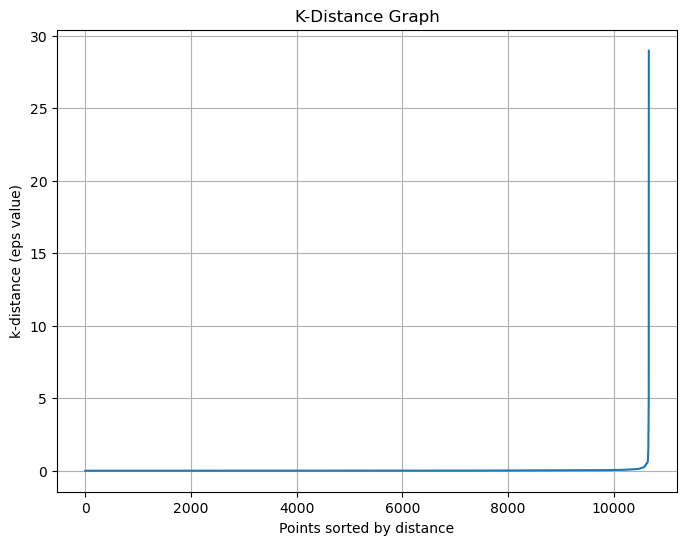

In [22]:
k_dist = distances[:, min_points-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()


In [23]:
chosen_eps = 0.4  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_points)


In [24]:
clusters = dbscan.fit_predict(scaler)


In [25]:
pd.Series(clusters).value_counts()

 0     10534
-1        46
 6        16
 10        8
 15        6
 5         5
 18        4
 16        4
 12        4
 9         4
 8         4
 17        4
 13        3
 7         3
 11        3
 4         3
 14        3
 3         3
 2         3
 1         3
dtype: int64

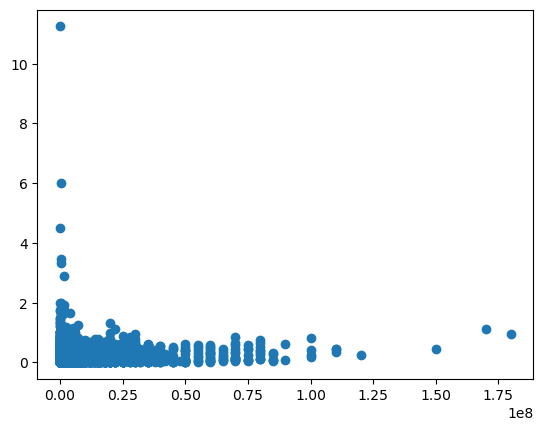

In [26]:
plt.scatter(x=df['current_value'] , y=df['goals'])
plt.show()

In [27]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg


-0.6851047462782498

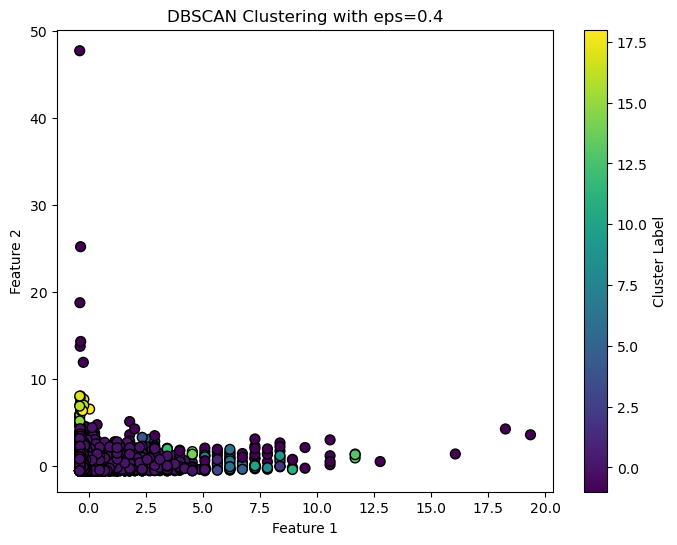

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(scaler[:, 0], scaler[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [29]:
X['dbscan'] = clusters


In [30]:
X['dbscan'].value_counts()


 0     10534
-1        46
 6        16
 10        8
 15        6
 5         5
 18        4
 16        4
 12        4
 9         4
 8         4
 17        4
 13        3
 7         3
 11        3
 4         3
 14        3
 3         3
 2         3
 1         3
Name: dbscan, dtype: int64

<AxesSubplot:xlabel='current_value', ylabel='goals'>

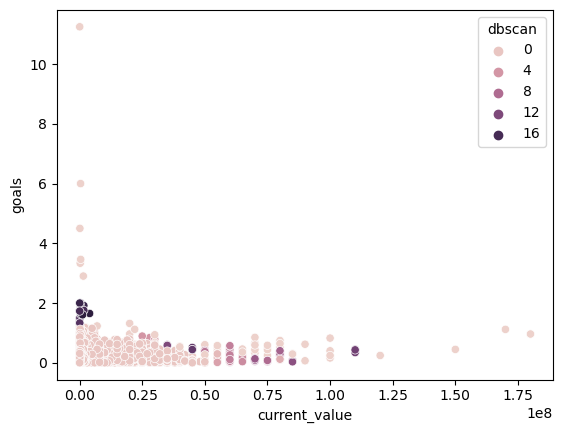

In [31]:
sns.scatterplot(data = X , x = 'current_value', y = 'goals', hue = 'dbscan')
